In [106]:
#Import necessary pkg
import tensorflow as tf
import random
import matplotlib.pyplot as plt

First, let's define a neuron (w/o activation function).

The neuron should have a weight and a bias.

it computes y = X * W + b


In [107]:
class Neuron:
  def __init__(self,init_w,init_b):
    self.w=init_w
    self.b=init_b

  def compute(self,input):
    y=tf.tensordot(input,self.w,axes=1)+init_b
    return y

  def set_w(self,w):
    self.w=w

  def set_b(self,b):
    self.b=b

      


This is the input and target for the whole dataset

In [108]:
X=[[0.09,-0.44,-0.15],
[0.69, -0.99, -0.76],
[0.34,0.65, -0.73],
[0.15, 0.78, -0.58],
[-0.63, -0.78, -0.56],
[0.96, 0.62, -0.66],
[0.63, -0.45, -0.14],
[0.88, 0.64, -0.33]]

Y=[-2.57,-2.97,0.96,1.04,-3.21,1.05,-2.39,0.66]

SGD:

W→W+αx(t-y)

b→b+α(t-y)

In [109]:
def loss(neuron, alpha, input, target):
  y = neuron.compute(input)

  w = neuron.w+tf.reshape(alpha*tf.tensordot(tf.transpose(input),(target-y),axes=1),neuron.w.shape)
  b = neuron.b+tf.reshape(alpha*(target-y),neuron.b.shape)
  
  neuron.set_w(w)
  neuron.set_b(b)

  diff = (neuron.compute(input)-target).numpy()

  sum=0
  for i in diff:
    sum=sum+i*i

  return sum

Define Hyperparameters:


In [110]:
alpha = 0.01
init_w=tf.convert_to_tensor([0.77,0.02,0.63])
init_b=tf.convert_to_tensor([0.0],tf.float32)
EPOCH=1000

Training of SGD for this neuron on the dataset {X,Y}

In [111]:
N=Neuron(init_w,init_b)
SGD_loss=[]
for e in range(EPOCH):
  i = random.randint(0,7)
  input=tf.reshape(tf.convert_to_tensor(X[i],tf.float32),(1,3))
  target=tf.reshape(tf.convert_to_tensor([Y[i]],tf.float32),(1,))
  SGD_loss.append(loss(N,alpha,input,target))
  if e%100 == 0:
    print("Loss of Epoch No.", str(e), ": ",str(SGD_loss[len(SGD_loss)-1]))

fit = N.compute(tf.convert_to_tensor(X))
print("Final result: ", fit)

Loss of Epoch No. 0 :  0.49246925115585327
Loss of Epoch No. 100 :  0.034831829369068146
Loss of Epoch No. 200 :  0.08240441232919693
Loss of Epoch No. 300 :  0.07677735388278961
Loss of Epoch No. 400 :  0.08336010575294495
Loss of Epoch No. 500 :  1.8431310653686523
Loss of Epoch No. 600 :  1.6403942108154297
Loss of Epoch No. 700 :  0.053237706422805786
Loss of Epoch No. 800 :  1.0635879039764404
Loss of Epoch No. 900 :  0.44711947441101074
Final result:  tf.Tensor(
[-1.3854927  -3.6923053   0.7573333   1.3108642  -2.8463213   0.76579493
 -1.4036285   1.2659377 ], shape=(8,), dtype=float32)


Plot loss graph

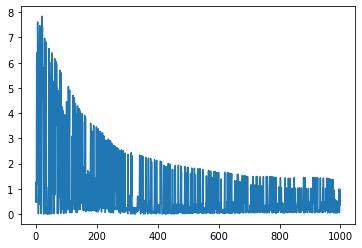

In [112]:
plt.plot([i for i in range (len(SGD_loss))],SGD_loss)
plt.show()

GD:

W→W+αx(t-y)

b→b+α•1•(t-y)

Since I programmed the loss in such a way that it can also be applied to GD, all we need to do is to modify the format of the bias.

In [113]:
#Define hyper-parameter
alpha = 0.01
init_w=tf.convert_to_tensor([0.77,0.02,0.63])
init_b=tf.convert_to_tensor([0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0],tf.float32)
EPOCH = 100

In [114]:
N=Neuron(init_w,init_b)

input = tf.convert_to_tensor(X)
target =tf.convert_to_tensor(Y)

GD_loss=[]

for i in range(EPOCH):
  y = N.compute(tf.convert_to_tensor(X))
  GD_loss.append(loss(N,alpha,input,target))
  if i%10 == 0: #Print for every 10 epochs so it is not cluttered
    print("Loss of Epoch No.", str(i), ": ",str(GD_loss[len(GD_loss)-1]))
  
fit = N.compute(tf.convert_to_tensor(X))
print("Final result: ", fit)

Loss of Epoch No. 0 :  30.30452311038971
Loss of Epoch No. 10 :  17.19684610143304
Loss of Epoch No. 20 :  10.615725502371788
Loss of Epoch No. 30 :  7.257799781858921
Loss of Epoch No. 40 :  5.5217415089719
Loss of Epoch No. 50 :  4.613725779694505
Loss of Epoch No. 60 :  4.133337681181729
Loss of Epoch No. 70 :  3.8759100176393986
Loss of Epoch No. 80 :  3.7357654720544815
Loss of Epoch No. 90 :  3.657896365970373
Final result:  tf.Tensor(
[-1.3725529  -3.6551137   0.74439764  1.2912881  -2.8394566   0.76578474
 -1.3800147   1.2648689 ], shape=(8,), dtype=float32)


Plot loss graph

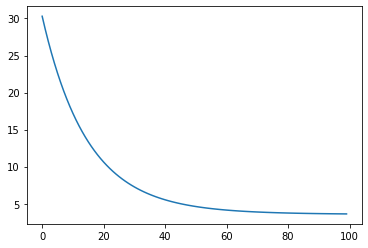

In [115]:
plt.plot([i for i in range (len(GD_loss))],GD_loss)
plt.show()